In [1]:
import tensorflow as tf
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

In [2]:
vocab_size = 10000
max_len = 200
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)

In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [4]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000, 200), (25000,), (25000, 200), (25000,))

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128, input_length=max_len),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 flatten (Flatten)           (None, 25600)             0         
                                                                 
 dense (Dense)               (None, 128)               3276928   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4557057 (17.38 MB)
Trainable params: 4557057 (17.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5


196/196 [==============================] - 20s 79ms/step - loss: 0.4308 - accuracy: 0.7796 - val_loss: 0.3062 - val_accuracy: 0.8688
Epoch 2/5
196/196 [==============================] - 13s 68ms/step - loss: 0.0892 - accuracy: 0.9708 - val_loss: 0.3759 - val_accuracy: 0.8577
Epoch 3/5
196/196 [==============================] - 13s 68ms/step - loss: 0.0084 - accuracy: 0.9989 - val_loss: 0.4472 - val_accuracy: 0.8627
Epoch 4/5
196/196 [==============================] - 14s 72ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4761 - val_accuracy: 0.8647
Epoch 5/5
196/196 [==============================] - 15s 76ms/step - loss: 4.5824e-04 - accuracy: 1.0000 - val_loss: 0.4968 - val_accuracy: 0.8649


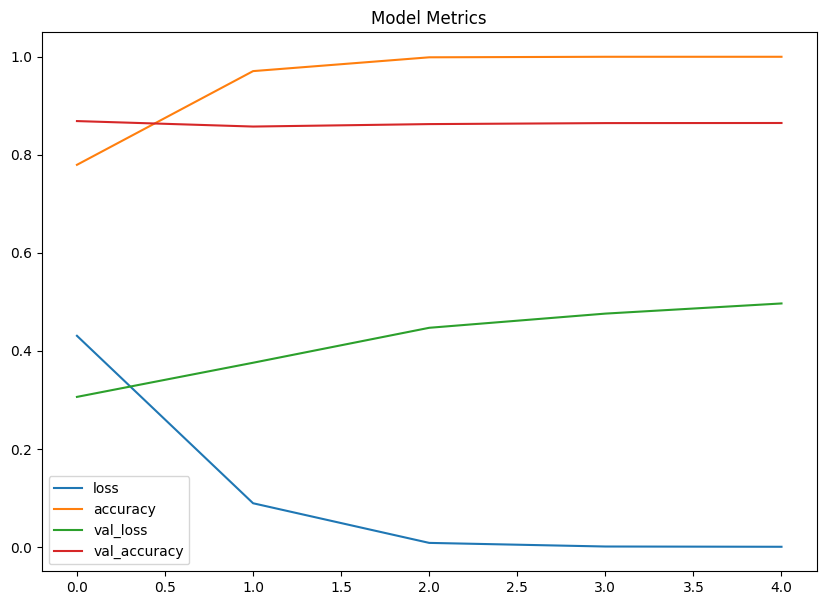

In [11]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Model Metrics")
plt.show()

In [12]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)

782/782 [==============================] - 6s 7ms/step - loss: 0.4968 - accuracy: 0.8649
Test Accuracy: 0.8649200201034546


In [13]:
y_pred = model.predict(x_test)

782/782 [==============================] - 7s 8ms/step


In [14]:
y_pred

array([[0.01119766],
       [0.99999857],
       [0.97098386],
       ...,
       [0.0045003 ],
       [0.01115265],
       [0.9244665 ]], dtype=float32)

In [15]:
y_pred = y_pred.flatten()

In [16]:
y_pred

array([0.01119766, 0.99999857, 0.97098386, ..., 0.0045003 , 0.01115265,
       0.9244665 ], dtype=float32)

In [17]:
y_pred = (y_pred > 0.5).astype(int)

In [18]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86     12500
           1       0.86      0.87      0.87     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



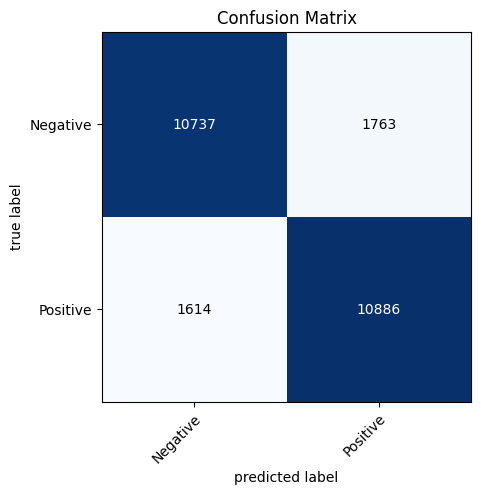

In [19]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.show()